In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

import sys
sys.path.append("/home/hugo/projetos-doutorado/mimo_emb_fts/src/")
import matplotlib.pyplot as plt
from embfts.models.MimoNonStationaryFtsPca import MimoNonStationaryFtsPca
from pyFTS.models.nonstationary import nsfts
from pyFTS.benchmarks import Measures
from pyFTS.benchmarks import Measures
import matplotlib.pyplot as plt
from pyFTS.common import Util
import datetime
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math
from embfts.util.DataSetUtil import DataSetUtil


np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [6]:
data_set_util = DataSetUtil()

### Dataset

In [7]:
df = pd.read_csv('/home/hugo/projetos-doutorado/mimo_emb_fts/data/air/air_quality_beijing.csv', sep=',')
df = df.drop(labels=['No','day','year','month','hour','wd','station'], axis=1)
df = df.drop(labels=['No.1','day.1','year.1','month.1','hour.1','wd.1','station.1'], axis=1)
df = df.drop(labels=['No.2','day.2','year.2','month.2','hour.2','wd.2','station.2'], axis=1)
df = df.drop(labels=['No.3','day.3','year.3','month.3','hour.3','wd.3','station.3'], axis=1)
df = df.drop(labels=['No.4','day.4','year.4','month.4','hour.4','wd.4','station.4'], axis=1)
df = df.drop(labels=['No.5','day.5','year.5','month.5','hour.5','wd.5','station.5'], axis=1)
df = df.drop(labels=['No.6','day.6','year.6','month.6','hour.6','wd.6','station.6'], axis=1)
df = df.drop(labels=['No.7','day.7','year.7','month.7','hour.7','wd.7','station.7'], axis=1)
df = df.drop(labels=['No.8','day.8','year.8','month.8','hour.8','wd.8','station.8'], axis=1)
df = df.drop(labels=['No.9','day.9','year.9','month.9','hour.9','wd.9','station.9'], axis=1)
df = df.drop(labels=['No.10','day.10','year.10','month.10','hour.10','wd.10','station.10'], axis=1)
df = df.drop(labels=['No.11','day.11','year.11','month.11','hour.11','wd.11','station.11'], axis=1)
df.dropna(inplace=True)
pd.set_option('display.max_columns', None)
df

PM2.5  PM10   SO2   NO2     CO     O3  TEMP    PRES  DEWP  RAIN  WSPM  \
23      24.0  24.0  26.0  54.0  600.0   36.0  -0.2  1030.5 -17.4   0.0   1.4   
24      22.0  24.0  24.0  44.0  500.0   44.0  -0.4  1031.0 -17.6   0.0   1.4   
25      14.0  17.0  21.0  36.0  400.0   50.0  -1.0  1031.3 -17.3   0.0   1.1   
32       3.0   7.0  21.0  49.0  500.0   43.0  -0.4  1029.6 -17.6   0.0   1.8   
33      10.0  14.0  47.0  62.0  700.0   29.0   0.6  1029.7 -16.7   0.0   1.7   
...      ...   ...   ...   ...    ...    ...   ...     ...   ...   ...   ...   
35052    6.0  13.0   3.0  10.0  200.0  112.0  12.9  1015.4 -14.9   0.0   3.3   
35053    6.0   8.0   3.0   9.0  100.0  115.0  14.0  1014.5 -15.0   0.0   2.9   
35061   16.0  37.0  10.0  66.0  700.0   58.0  10.8  1014.2 -13.3   0.0   1.1   
35062   21.0  44.0  12.0  87.0  700.0   35.0  10.5  1014.4 -12.9   0.0   1.2   
35063   19.0  31.0  10.0  79.0  600.0   42.0   8.6  1014.1 -15.9   0.0   1.3   

       PM2.5.1  PM10.1  SO2.1  NO2.1    CO.1  O3.1  TEMP.1  PRES.1  DEWP.1  \
23         7.0    12.0   43.0   25.0   500.0  65.0     0.3  1027.0   -16.6   
24        11.0    13.0   23.0   16.0   400.0  69.0    -0.5  1027.4   -16.4   
25        12.0    10.0   24.0   18.0   400.0  67.0    -1.8  1027.9   -16.7   
32        22.0    26.0   41.0   66.0  1100.0  14.0    -2.0  1026.4   -15.1   
33        29.0    43.0   53.0   69.0  1600.0  13.0    -0.2  1026.3   -16.6   
...        ...     ...    ...    ...     ...   ...     ...     ...     ...   
35052      7.0    11.0    4.0   19.0   400.0  66.0    13.9  1010.6   -11.6   
35053      9.0    12.0    4.0   17.0   300.0  70.0    14.4  1009.4   -12.0   
35061      7.0    23.0    5.0   17.0   500.0  68.0     9.5  1009.4   -13.0   
35062     11.0    20.0    3.0   15.0   500.0  72.0     7.8  1009.6   -12.6   
35063     20.0    25.0    6.0   28.0   900.0  54.0     7.0  1009.4   -12.2   

       RAIN.1  WSPM.1  PM2.5.2  PM10.2  SO2.2  NO2.2   CO.2   O3.2  TEMP.2  \
23        0.0     1.5      6.0     9.0    3.0    2.0  300.0   72.0     0.3   
24        0.0     3.0      4.0     7.0    3.0    2.0  200.0   74.0    -0.5   
25        0.0     0.9      6.0     6.0    3.0    2.0  200.0   75.0    -1.8   
32        0.0     1.0     36.0    18.0   16.0   52.0  900.0   12.0    -2.0   
33        0.0     0.5     27.0    41.0   18.0   43.0  900.0   20.0    -0.2   
...       ...     ...      ...     ...    ...    ...    ...    ...     ...   
35052     0.0     3.8      5.0    13.0    3.0    5.0  300.0   89.0    13.9   
35053     0.0     3.3      8.0    11.0    2.0    3.0  300.0   92.0    14.4   
35061     0.0     1.5      9.0    14.0    2.0    2.0  200.0  102.0     9.5   
35062     0.0     1.4     10.0    12.0    2.0    2.0  200.0   97.0     7.8   
35063     0.0     1.9     13.0    16.0    4.0    9.0  500.0   74.0     7.0   

       PRES.2  DEWP.2  RAIN.2  WSPM.2  PM2.5.3  PM10.3  SO2.3  NO2.3    CO.3  \
23     1027.0   -16.6     0.0     1.5      8.0    14.0   16.0   58.0   600.0   
24     1027.4   -16.4     0.0     3.0      4.0    11.0   11.0   45.0   500.0   
25     1027.9   -16.7     0.0     0.9      3.0     6.0   11.0   43.0   500.0   
32     1026.4   -15.1     0.0     1.0      3.0     6.0   19.0   48.0   600.0   
33     1026.3   -16.6     0.0     0.5      3.0     6.0   24.0   49.0   500.0   
...       ...     ...     ...     ...      ...     ...    ...    ...     ...   
35052  1010.6   -11.6     0.0     3.8      5.0    27.0    2.0   11.0   300.0   
35053  1009.4   -12.0     0.0     3.3      9.0    12.0    2.0    8.0   200.0   
35061  1009.4   -13.0     0.0     1.5     23.0    58.0    5.0   61.0   700.0   
35062  1009.6   -12.6     0.0     1.4     23.0    53.0    9.0   75.0   900.0   
35063  1009.4   -12.2     0.0     1.9     30.0    71.0   11.0   87.0  1200.0   

       O3.3  TEMP.3  PRES.3  DEWP.3  RAIN.3  WSPM.3  PM2.5.4  PM10.4  SO2.4  \
23     39.0    -0.5  1032.8   -19.7     0.0     2.1     13.0    15.0   11.0   
24     52.0    -0.7  1033.0   -18.3     0.0     0.6  

In [29]:
round(df.describe(),3)

PM2.5       PM10        SO2        NO2         CO         O3  \
count  17117.000  17117.000  17117.000  17117.000  17117.000  17117.000   
mean      83.296    110.694     15.999     60.439   1333.242     63.307   
std       82.385     94.282     20.085     38.193   1302.951    740.002   
min        3.000      3.000      1.000      2.000    100.000      1.000   
25%       21.000     37.000      3.000     31.000    500.000      8.000   
50%       58.000     86.000      8.000     54.000    900.000     43.000   
75%      116.000    158.000     20.000     84.000   1600.000     80.000   
max      713.000    948.000    185.000    290.000  10000.000  78183.000   

           TEMP         PRES       DEWP       RAIN  ...    PM10.11     SO2.11  \
count  17117.00    17117.000  17117.000  17117.000  ...  17117.000  17117.000   
mean       9.46     1072.132      1.863      0.057  ...    112.915     15.840   
std      706.74     7728.333     13.732      0.682  ...     95.566     20.651   
min    -9575.00      987.800    -35.300      0.000  ...      3.000      1.000   
25%        2.40     1004.500     -9.200      0.000  ...     40.000      2.000   
50%       12.60     1012.500      1.400      0.000  ...     90.000      8.000   
75%       22.70     1021.500     14.500      0.000  ...    155.000     21.000   
max    21475.00  1012125.000     28.500     29.300  ...    811.000    272.000   

          NO2.11      CO.11      O3.11    TEMP.11      PRES.11    DEWP.11  \
count  17117.000  17117.000  17117.000  17117.000    17117.000  17117.000   
mean      56.154   1378.365     59.617      9.631     1071.910      1.547   
std       35.883   1227.164    640.477    706.740     7728.334     13.666   
min        2.000    100.000      1.000  -9575.000      987.800    -35.300   
25%       29.000    600.000      8.000      2.600     1004.100     -9.400   
50%       49.000   1000.000     42.000     12.800     1012.100      1.000   
75%       77.000   1700.000     79.000     22.900     1021.600     14.200   
max      235.000   9800.000  83538.000  21475.000  1012125.000     28.000   

         RAIN.11    WSPM.11  
count  17117.000  17117.000  
mean       0.060      1.757  
std        0.722      1.195  
min        0.000      0.000  
25%        0.000      0.900  
50%        0.000      1.400  
75%        0.000      2.300  
max       29.300     13.200  

[8 rows x 132 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17117 entries, 23 to 35063
Columns: 132 entries, PM2.5 to WSPM.11
dtypes: float64(132)
memory usage: 17.4 MB


In [5]:
#df.index = df.index.strftime("%d/%m/%Y, %H:%M:%S")

In [6]:
# y_appliances = df['Appliances']
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 5])
# ax.plot(y_appliances, label='Appliances')
# handles, labels = ax.get_legend_handles_labels()
# lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
# plt.show()

In [7]:
# y_appliances = pd.DataFrame(df['Appliances'])
# y_appliances

In [8]:
# # from plotly.plotly import plot_mpl
# from statsmodels.tsa.seasonal import seasonal_decompose
# # result = seasonal_decompose(y_appliances, model='multiplicative')
# # fig = result.plot()
# #result = seasonal_decompose(y_appliances, model='additive')
# result=seasonal_decompose(df['Appliances'],model='add',freq=365)

# # import statsmodels.api as sm
# # seas_d=sm.tsa.seasonal_decompose(df['Appliances'],model='add',freq=365);
# # fig=seas_d.plot()
# # fig.set_figheight(4)
# # plt.show()


In [9]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# # result = seasonal_decompose(y_appliances, model='multiplicative')
# #result = seasonal_decompose(y_appliances, model='additive')
# result=seasonal_decompose(y_appliances,model='add',period=100)

In [10]:
# fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,15))
# result.trend.plot(ax=ax1)
# result.resid.plot(ax=ax2)
# result.seasonal.plot(ax=ax3)

In [31]:
# import statsmodels.api as sm
# from matplotlib import pyplot
# from statsmodels.graphics.tsaplots import plot_acf
# #Correlograms
# fig,ax= plt.subplots(2,1, figsize=(15,10))
# fig=sm.tsa.graphics.plot_acf(df['NOx(GT)'], lags=200, ax=ax[0])
# fig=sm.tsa.graphics.plot_pacf(df['NOx(GT)'], lags=200, ax=ax[1])
# plt.show()

In [129]:
# fig.set_figheight(4)
# result.plot()
# plt.show()


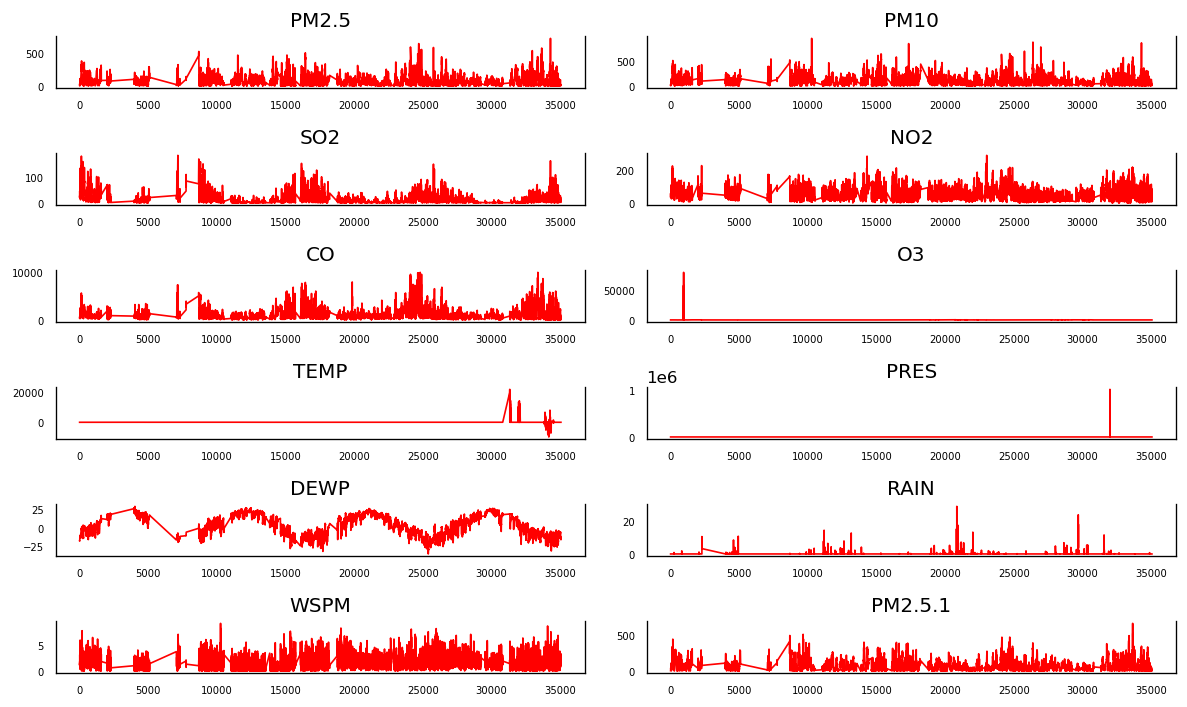

In [32]:
# Plot
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [15]:
### Testing Causation using Granger’s Causality Test

In [16]:
# from statsmodels.tsa.stattools import grangercausalitytests
# maxlag=12
# test = 'ssr_chi2test'
# def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
#     """Check Granger Causality of all possible combinations of the Time series.
#     The rows are the response variable, columns are predictors. The values in the table 
#     are the P-Values. P-Values lesser than the significance level (0.05), implies 
#     the Null Hypothesis that the coefficients of the corresponding past values is 
#     zero, that is, the X does not cause Y can be rejected.

#     data      : pandas dataframe containing the time series variables
#     variables : list containing names of the time series variables.
#     """
#     df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
#     for c in df.columns:
#         for r in df.index:
#             test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
#             p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
#             if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
#             min_p_value = np.min(p_values)
#             df.loc[r, c] = min_p_value
#     df.columns = [var + '_x' for var in variables]
#     df.index = [var + '_y' for var in variables]
#     return df

# grangers_matrix = grangers_causation_matrix(df, variables = df.columns)     

In [17]:
#grangers_matrix

In [18]:
# f, ax = plt.subplots(figsize=(25, 20))
# sns.heatmap(grangers_matrix, cmap='RdYlGn_r', annot=True,linewidths=.5)

### Correlation Test

<AxesSubplot:>

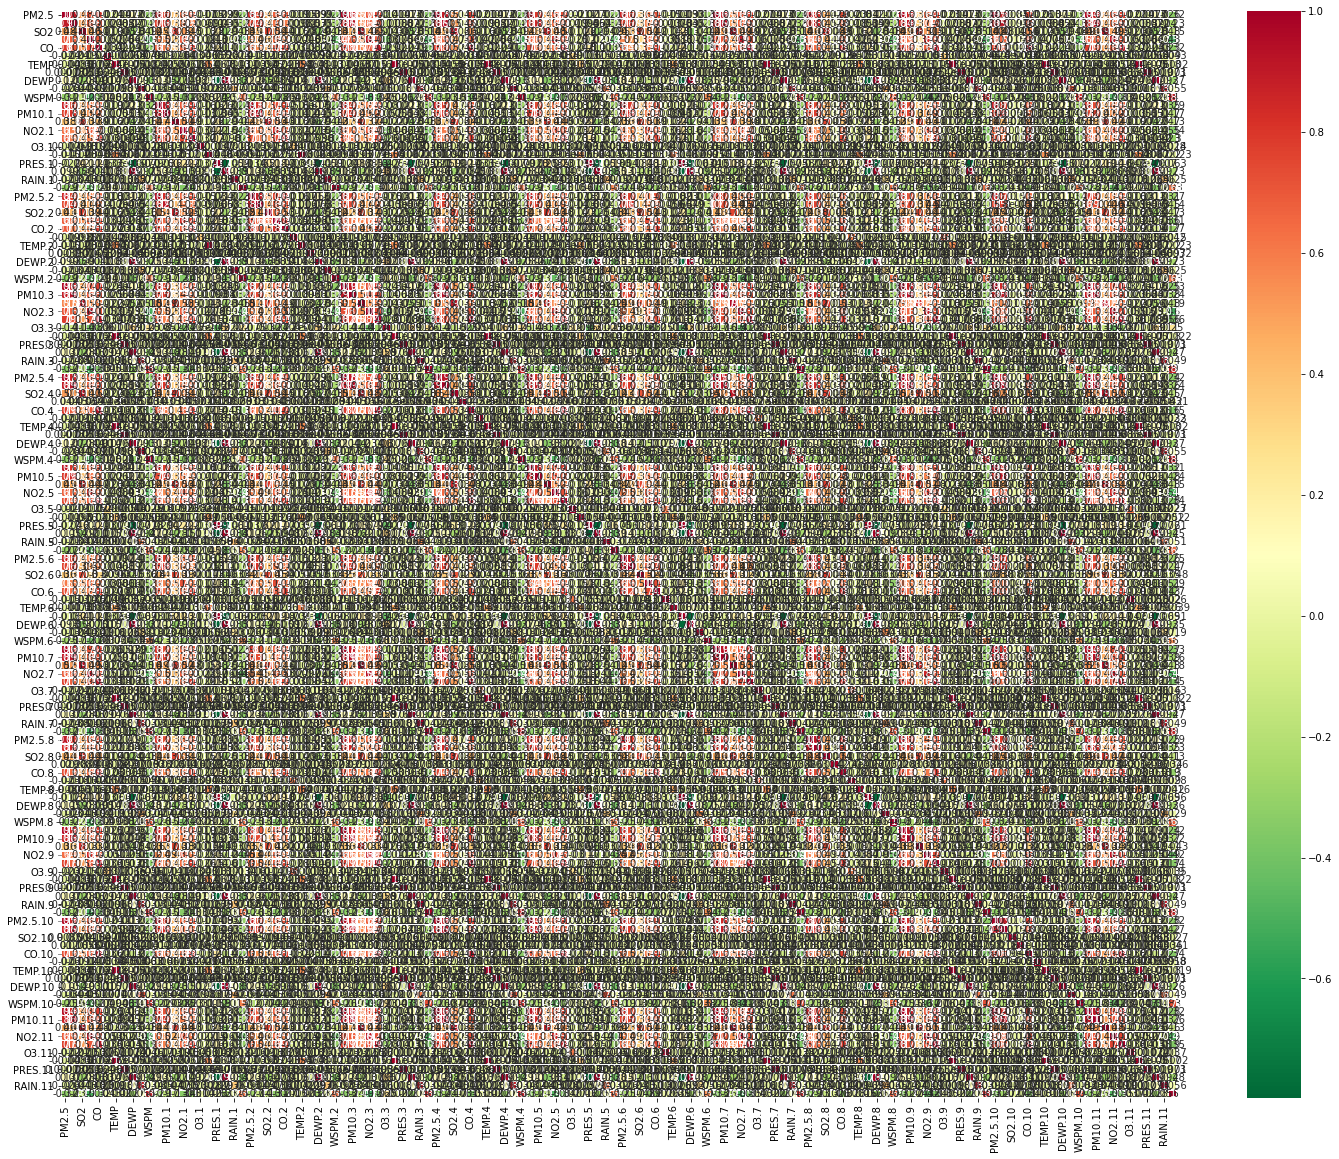

In [33]:
# cov_data= df.corr()
# f, ax = plt.subplots(figsize=(25, 20))
# sns.heatmap(cov_data, cmap='RdYlGn_r', annot=True,linewidths=.5)

In [34]:
cov_data= df.corr()
cov_data

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5    1.000000  0.895408  0.481251  0.709024  0.798562 -0.023851 -0.013543   
PM10     0.895408  1.000000  0.482848  0.678746  0.703737 -0.023732 -0.008507   
SO2      0.481251  0.482848  1.000000  0.456980  0.510309 -0.018505 -0.035639   
NO2      0.709024  0.678746  0.456980  1.000000  0.715497 -0.051865 -0.007575   
CO       0.798562  0.703737  0.510309  0.715497  1.000000 -0.033720 -0.019864   
...           ...       ...       ...       ...       ...       ...       ...   
TEMP.11 -0.013586 -0.008532 -0.035611 -0.007553 -0.019924  0.000250  0.999999   
PRES.11  0.000766  0.008225 -0.005093  0.005642  0.002435 -0.000677 -0.000064   
DEWP.11  0.127181  0.071768 -0.276481  0.045623 -0.082948  0.013994  0.076404   
RAIN.11 -0.026323 -0.039889 -0.048444 -0.048083 -0.022549  0.000897  0.001762   
WSPM.11 -0.322047 -0.232243 -0.150440 -0.510791 -0.324515  0.043210 -0.002026   

             PRES      DEWP      RAIN  ...   PM10.11    SO2.11    NO2.11  \
PM2.5    0.000774  0.122601 -0.027746  ...  0.863615  0.458516  0.685175   
PM10     0.008231  0.070191 -0.040309  ...  0.903571  0.456665  0.646870   
SO2     -0.005083 -0.276947 -0.048857  ...  0.487305  0.910504  0.492704   
NO2      0.005646  0.043986 -0.048599  ...  0.666095  0.424400  0.887090   
CO       0.002433 -0.091259 -0.020506  ...  0.698142  0.478463  0.692241   
...           ...       ...       ...  ...       ...       ...       ...   
TEMP.11 -0.000066  0.076290  0.001796  ... -0.009438 -0.029515 -0.005184   
PRES.11  1.000000  0.001669 -0.000730  ... -0.001082 -0.004530  0.000775   
DEWP.11  0.001884  0.996773  0.094013  ...  0.061034 -0.264441 -0.020658   
RAIN.11 -0.000732  0.092884  0.880549  ... -0.037390 -0.045777 -0.048774   
WSPM.11  0.001005 -0.271749  0.055320  ... -0.256002 -0.129232 -0.487417   

            CO.11     O3.11   TEMP.11   PRES.11   DEWP.11   RAIN.11   WSPM.11  
PM2.5    0.769490 -0.022473 -0.013586  0.000766  0.127181 -0.026323 -0.322047  
PM10     0.674791 -0.020522 -0.008532  0.008225  0.071768 -0.039889 -0.232243  
SO2      0.500650 -0.020856 -0.035611 -0.005093 -0.276481 -0.048444 -0.150440  
NO2      0.705031 -0.052529 -0.007553  0.005642  0.045623 -0.048083 -0.510791  
CO       0.897672 -0.036561 -0.019924  0.002435 -0.082948 -0.022549 -0.324515  
...           ...       ...       ...       ...       ...       ...       ...  
TEMP.11 -0.014400  0.001072  1.000000 -0.000066  0.076372  0.001739 -0.002034  
PRES.11 -0.001514 -0.000745 -0.000066  1.000000  0.001867 -0.000732  0.001012  
DEWP.11 -0.038065  0.022074  0.076372  0.001867  1.000000  0.094163 -0.276210  
RAIN.11 -0.019499  0.001040  0.001739 -0.000732  0.094163  1.000000  0.056451  
WSPM.11 -0.349134  0.036868 -0.002034  0.001012 -0.276210  0.056451  1.000000  

[132 rows x 132 columns]

In [35]:
# from statsmodels.tsa.vector_ar.vecm import coint_johansen

# def cointegration_test(df, alpha=0.05): 
#     """Perform Johanson's Cointegration Test and Report Summary"""
#     out = coint_johansen(df,-1,5)
#     d = {'0.90':0, '0.95':1, '0.99':2}
#     traces = out.lr1
#     cvts = out.cvt[:, d[str(1-alpha)]]
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Summary
#     print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
#     for col, trace, cvt in zip(df.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# cointegration_test(df)

In [36]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [37]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "PM2.5" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.2305
 No. Lags Chosen       = 25
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.8328
 No. Lags Chosen       = 14
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0

    Augmented Dickey-Fuller Test on "RAIN.1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -20.7034
 No. Lags Chosen       = 29
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "WSPM.1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.8742
 No. Lags Chosen       = 43
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM2.5.2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

    Augmented Dickey-Fuller Test on "PRES.3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -130.8283
 No. Lags Chosen       = 0
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DEWP.3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7921
 No. Lags Chosen       = 38
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RAIN.3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Leve

    Augmented Dickey-Fuller Test on "O3.5" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.238
 No. Lags Chosen       = 44
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "TEMP.5" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.8394
 No. Lags Chosen       = 43
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PRES.5" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    

    Augmented Dickey-Fuller Test on "NO2.7" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.7076
 No. Lags Chosen       = 36
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CO.7" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.3983
 No. Lags Chosen       = 30
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "O3.7" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

    Augmented Dickey-Fuller Test on "PM10.9" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -18.9763
 No. Lags Chosen       = 12
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SO2.9" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.4892
 No. Lags Chosen       = 44
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NO2.9" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   

    Augmented Dickey-Fuller Test on "WSPM.10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.0413
 No. Lags Chosen       = 38
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM2.5.11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.0813
 No. Lags Chosen       = 32
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM10.11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

In [38]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "PM2.5" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -27.9811
 No. Lags Chosen       = 40
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -28.3966
 No. Lags Chosen       = 41
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0

    Augmented Dickey-Fuller Test on "RAIN.1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -31.2348
 No. Lags Chosen       = 44
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "WSPM.1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -31.2172
 No. Lags Chosen       = 42
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM2.5.2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

    Augmented Dickey-Fuller Test on "PRES.3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -33.6931
 No. Lags Chosen       = 44
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DEWP.3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -28.0678
 No. Lags Chosen       = 37
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RAIN.3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

    Augmented Dickey-Fuller Test on "O3.5" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -34.2298
 No. Lags Chosen       = 41
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "TEMP.5" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -27.9206
 No. Lags Chosen       = 44
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PRES.5" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   

    Augmented Dickey-Fuller Test on "NO2.7" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.3612
 No. Lags Chosen       = 41
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CO.7" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -27.4809
 No. Lags Chosen       = 42
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "O3.7" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

    Augmented Dickey-Fuller Test on "PM10.9" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -27.4889
 No. Lags Chosen       = 43
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SO2.9" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.5462
 No. Lags Chosen       = 44
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NO2.9" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   

    Augmented Dickey-Fuller Test on "WSPM.10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -31.0928
 No. Lags Chosen       = 44
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM2.5.11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -26.6829
 No. Lags Chosen       = 44
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM10.11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

### KPSS test

In [39]:
# regression='ct'
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, name='', **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Test on "{name}"', "\n   ", '-'*47)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [40]:
for name, column in df.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

KPSS Test on "PM2.5" 
    -----------------------------------------------
KPSS Statistic: 0.229487722196655
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PM10" 
    -----------------------------------------------
KPSS Statistic: 0.8714705583345392
p-value: 0.01
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "SO2" 
    -----------------------------------------------
KPSS Statistic: 2.460378560398562
p-value: 0.01
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "NO2" 
    -----------------------------------------------
KPSS Statistic: 0.8029383538991917
p-value: 0.01
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  war

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

KPSS Test on "PM10.6" 
    -----------------------------------------------
KPSS Statistic: 0.8279205159343016
p-value: 0.01
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "SO2.6" 
    -----------------------------------------------
KPSS Statistic: 5.883294342663586
p-value: 0.01
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "NO2.6" 
    -----------------------------------------------
KPSS Statistic: 0.9956316268082778
p-value: 0.01
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "CO.6" 
    -----------------------------------------------
KPSS Statistic: 0.49743383766132193
p-value: 0.04224463115735993
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is no

KPSS Test on "RAIN.10" 
    -----------------------------------------------
KPSS Statistic: 0.16049440678733126
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "WSPM.10" 
    -----------------------------------------------
KPSS Statistic: 0.36692419756034306
p-value: 0.09141198381019695
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PM2.5.11" 
    -----------------------------------------------
KPSS Statistic: 0.3217387769173003
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PM10.11" 
    -----------------------------------------------
KPSS Statistic: 0.5737488726063706
p-value: 0.025056560223790388
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

In [41]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  war

KPSS Test on "PM2.5" 
    -----------------------------------------------
KPSS Statistic: 0.002251642681145678
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PM10" 
    -----------------------------------------------
KPSS Statistic: 0.0026265779353974003
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "SO2" 
    -----------------------------------------------
KPSS Statistic: 0.0017916054704555197
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "NO2" 
    -----------------------------------------------
KPSS Statistic: 0.0017502017561439643
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

KPSS Test on "O3.3" 
    -----------------------------------------------
KPSS Statistic: 0.0022026777879700665
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "TEMP.3" 
    -----------------------------------------------
KPSS Statistic: 0.0014532147723260542
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PRES.3" 
    -----------------------------------------------
KPSS Statistic: 0.0013145836730613484
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "DEWP.3" 
    -----------------------------------------------
KPSS Statistic: 0.02289692728579647
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Tes

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

KPSS Test on "TEMP.4" 
    -----------------------------------------------
KPSS Statistic: 0.0014531929337224798
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PRES.4" 
    -----------------------------------------------
KPSS Statistic: 0.0013145841945615432
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "DEWP.4" 
    -----------------------------------------------
KPSS Statistic: 0.02313185500995146
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "RAIN.4" 
    -----------------------------------------------
KPSS Statistic: 0.0013191206841922812
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS T

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "WSPM.8" 
    -----------------------------------------------
KPSS Statistic: 0.00163514221927375
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PM2.5.9" 
    -----------------------------------------------
KPSS Statistic: 0.0024698620718554484
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PM10.9" 
    -----------------------------------------------
KPSS Statistic: 0.0024578179754285597
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "SO2.9" 
    -----------------------------------------------
KPSS Statistic: 0.0016163758117448423
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% 

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

Result: The series is stationary


KPSS Test on "TEMP.11" 
    -----------------------------------------------
KPSS Statistic: 0.001453149383091514
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "PRES.11" 
    -----------------------------------------------
KPSS Statistic: 0.0013145844632758879
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "DEWP.11" 
    -----------------------------------------------
KPSS Statistic: 0.022400512830323144
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "RAIN.11" 
    -----------------------------------------------
KPSS Statistic: 0.0013185897583544008
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Re

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The